## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import math

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Data

In [2]:
sample_data = pd.read_csv("sample_audio_data.csv")
sample_audio_data = np.array(sample_data.iloc[:,:-2])

In [4]:
def divide_into_frames(data,frame_length=2048, hop_length = 512):
    output = []
    n_frame = math.ceil(len(data)/hop_length)
    for i in range(n_frame-1):
        start_index = i * hop_length
        if start_index + frame_length > len(data):
            end_index = len(data)-hop_length*(n_frame-i)
            output.append(data[end_index-frame_length:end_index])
        else:
            output.append(data[start_index:start_index+frame_length])
    output.append(data[frame_length*(-1):])
    return np.array(output)

In [5]:
input_data = []
for i in range(len(sample_audio_data)):
    input_data.append(divide_into_frames(sample_audio_data[i]))
input_data = np.array(input_data)
input_data = input_data.reshape(3650*56,2048)

In [19]:
mfcc_list = []
count = 0
for i in input_data:
    mfcc_list.append(librosa.feature.mfcc(y=i,hop_length = 4096).T)
    count += 1
    if(count % 100 == 0):
        print(str(count) + " / "+str(3650*56))

100 / 204400
200 / 204400
300 / 204400
400 / 204400
500 / 204400
600 / 204400
700 / 204400
800 / 204400
900 / 204400
1000 / 204400
1100 / 204400
1200 / 204400
1300 / 204400
1400 / 204400
1500 / 204400
1600 / 204400
1700 / 204400
1800 / 204400
1900 / 204400
2000 / 204400
2100 / 204400
2200 / 204400
2300 / 204400
2400 / 204400
2500 / 204400
2600 / 204400
2700 / 204400
2800 / 204400
2900 / 204400
3000 / 204400
3100 / 204400
3200 / 204400
3300 / 204400
3400 / 204400
3500 / 204400
3600 / 204400
3700 / 204400
3800 / 204400
3900 / 204400
4000 / 204400
4100 / 204400
4200 / 204400
4300 / 204400
4400 / 204400
4500 / 204400
4600 / 204400
4700 / 204400
4800 / 204400
4900 / 204400
5000 / 204400
5100 / 204400
5200 / 204400
5300 / 204400
5400 / 204400
5500 / 204400
5600 / 204400
5700 / 204400
5800 / 204400
5900 / 204400
6000 / 204400
6100 / 204400
6200 / 204400
6300 / 204400
6400 / 204400
6500 / 204400
6600 / 204400
6700 / 204400
6800 / 204400
6900 / 204400
7000 / 204400
7100 / 204400
7200 / 204400
7

55500 / 204400
55600 / 204400
55700 / 204400
55800 / 204400
55900 / 204400
56000 / 204400
56100 / 204400
56200 / 204400
56300 / 204400
56400 / 204400
56500 / 204400
56600 / 204400
56700 / 204400
56800 / 204400
56900 / 204400
57000 / 204400
57100 / 204400
57200 / 204400
57300 / 204400
57400 / 204400
57500 / 204400
57600 / 204400
57700 / 204400
57800 / 204400
57900 / 204400
58000 / 204400
58100 / 204400
58200 / 204400
58300 / 204400
58400 / 204400
58500 / 204400
58600 / 204400
58700 / 204400
58800 / 204400
58900 / 204400
59000 / 204400
59100 / 204400
59200 / 204400
59300 / 204400
59400 / 204400
59500 / 204400
59600 / 204400
59700 / 204400
59800 / 204400
59900 / 204400
60000 / 204400
60100 / 204400
60200 / 204400
60300 / 204400
60400 / 204400
60500 / 204400
60600 / 204400
60700 / 204400
60800 / 204400
60900 / 204400
61000 / 204400
61100 / 204400
61200 / 204400
61300 / 204400
61400 / 204400
61500 / 204400
61600 / 204400
61700 / 204400
61800 / 204400
61900 / 204400
62000 / 204400
62100 / 20

109500 / 204400
109600 / 204400
109700 / 204400
109800 / 204400
109900 / 204400
110000 / 204400
110100 / 204400
110200 / 204400
110300 / 204400
110400 / 204400
110500 / 204400
110600 / 204400
110700 / 204400
110800 / 204400
110900 / 204400
111000 / 204400
111100 / 204400
111200 / 204400
111300 / 204400
111400 / 204400
111500 / 204400
111600 / 204400
111700 / 204400
111800 / 204400
111900 / 204400
112000 / 204400
112100 / 204400
112200 / 204400
112300 / 204400
112400 / 204400
112500 / 204400
112600 / 204400
112700 / 204400
112800 / 204400
112900 / 204400
113000 / 204400
113100 / 204400
113200 / 204400
113300 / 204400
113400 / 204400
113500 / 204400
113600 / 204400
113700 / 204400
113800 / 204400
113900 / 204400
114000 / 204400
114100 / 204400
114200 / 204400
114300 / 204400
114400 / 204400
114500 / 204400
114600 / 204400
114700 / 204400
114800 / 204400
114900 / 204400
115000 / 204400
115100 / 204400
115200 / 204400
115300 / 204400
115400 / 204400
115500 / 204400
115600 / 204400
115700 /

160800 / 204400
160900 / 204400
161000 / 204400
161100 / 204400
161200 / 204400
161300 / 204400
161400 / 204400
161500 / 204400
161600 / 204400
161700 / 204400
161800 / 204400
161900 / 204400
162000 / 204400
162100 / 204400
162200 / 204400
162300 / 204400
162400 / 204400
162500 / 204400
162600 / 204400
162700 / 204400
162800 / 204400
162900 / 204400
163000 / 204400
163100 / 204400
163200 / 204400
163300 / 204400
163400 / 204400
163500 / 204400
163600 / 204400
163700 / 204400
163800 / 204400
163900 / 204400
164000 / 204400
164100 / 204400
164200 / 204400
164300 / 204400
164400 / 204400
164500 / 204400
164600 / 204400
164700 / 204400
164800 / 204400
164900 / 204400
165000 / 204400
165100 / 204400
165200 / 204400
165300 / 204400
165400 / 204400
165500 / 204400
165600 / 204400
165700 / 204400
165800 / 204400
165900 / 204400
166000 / 204400
166100 / 204400
166200 / 204400
166300 / 204400
166400 / 204400
166500 / 204400
166600 / 204400
166700 / 204400
166800 / 204400
166900 / 204400
167000 /

In [21]:
mfcc_list = np.array(mfcc_list)
mfcc_list = mfcc_list.reshape(204400,20)
mfcc_list.shape

(204400, 20)

## Train FIN

In [22]:
#1. Load data
mfcc_X = input_data
mfcc_y = mfcc_list

In [84]:
#model
model = Sequential()
model.add(Dense(1024, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(258, activation='relu'))
model.add(Dense(258, activation='relu'))
model.add(Dense(258, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='relu'))
model.compile(optimizer='adam',
    loss='mse',
    metrics=['mse'])

In [85]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_125 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_126 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_127 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_128 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_129 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_130 (Dense)            (None, 258)             

In [39]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(mfcc_X, mfcc_y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((153300, 2048), (153300, 20), (51100, 2048), (51100, 20))

In [86]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Train on 153300 samples, validate on 51100 samples
Epoch 1/50
153300/153300 [==============================] - 363s 2ms/step - loss: 7523.1238 - mse: 7523.1255 - val_loss: 7472.9368 - val_mse: 7472.9302
Epoch 2/50
153300/153300 [==============================] - 268s 2ms/step - loss: 7466.8716 - mse: 7466.8779 - val_loss: 7457.0008 - val_mse: 7457.0015
Epoch 3/50
153300/153300 [==============================] - 247s 2ms/step - loss: 7451.5780 - mse: 7451.5820 - val_loss: 7449.4918 - val_mse: 7449.4893
Epoch 4/50
153300/153300 [==============================] - 243s 2ms/step - loss: 7439.7438 - mse: 7439.7417 - val_loss: 7430.2042 - val_mse: 7430.2070
Epoch 5/50
153300/153300 [==============================] - 242s 2ms/step - loss: 7417.3621 - mse: 7417.3579 - val_loss: 7415.5341 - val_mse: 7415.5352
Epoch 6/50
153300/153300 [==============================] - 245s 2ms/step - loss: 7407.2754 - mse: 7407.2817 - val_loss: 7411.2183 - val_mse: 7411.2188
Epoch 7/50
153300/153300 [===========

51100/51100 [==============================] - 9s 182us/step
Accuracy of our model on test data :  736348.046875 %


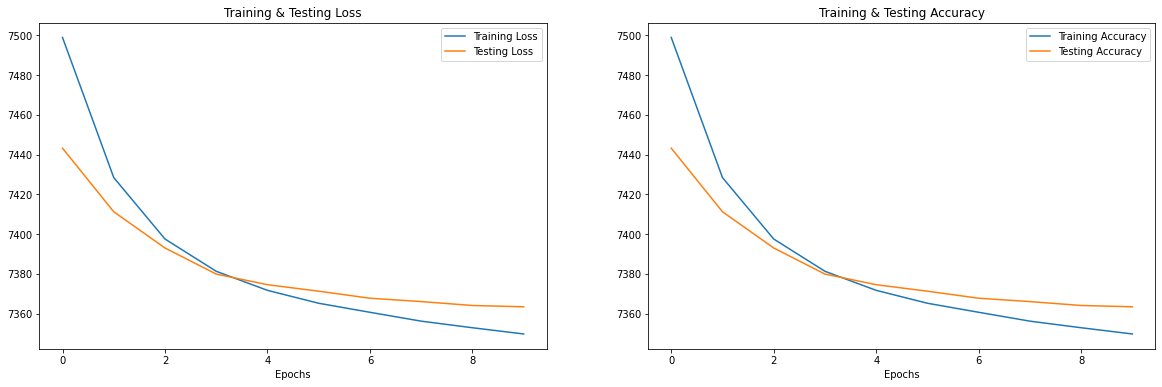

In [80]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['mean_squared_error']
train_loss = history.history['loss']
test_acc = history.history['val_mean_squared_error']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [81]:
pred = model.predict(x_test)
r2_score(y_test, pred)

-0.4308773999381974